# **Regularization to Prevent Overfitting**
---


### 🧑‍💼 **Shuvendu Pritam Das**  
*Data Science / ML Enthusiast*  

- **GitHub:** [SPritamDas](https://github.com/SPritamDas/My-Profile)  
- **LinkedIn:** [Shuvendu Pritam Das](https://www.linkedin.com/in/shuvendupritamdas/)  
- **Email:** shuvendupritamdas181@gmail.com  

---



### How to Avoid Overfitting in Deep Learning

Overfitting occurs when a model learns the training data too well, capturing noise and irrelevant patterns, leading to poor generalization on new data. Here are common strategies to avoid overfitting in deep learning:

1. **Adding Data (Data Augmentation)**
   - **Data Augmentation**: If more data is not available, we can artificially expand the dataset using transformations such as:
     - **Flipping (Up-Down, Side)**: Randomly flip the images horizontally or vertically to introduce variation.
     - **Cropping**: Randomly crop parts of the image and resize it back to the original dimensions, helping the model generalize better.
   - **If additional data is not available**:
     - **Unsupervised Pre-training**: Use self-supervised or unsupervised learning techniques to pre-train the model on a larger dataset without labels.
     - **Transfer Learning**: Fine-tune a pre-trained model on your smaller dataset, leveraging knowledge learned from a large dataset.

2. **Complexity Reduction**
   - **Early Stopping**: Monitor the model’s performance on validation data and stop training when the validation loss stops improving, preventing the model from learning noise.
     - **Early Stop Callback**: Automatically halt the training process if no improvement is detected after a certain number of epochs.
   - **Randomization by Dropout**: Regularly drop random neurons during training to prevent the model from relying too much on specific neurons and encourage the learning of more robust features.
   - **Regularization**:
     - **L1 Regularization (Lasso)**: Encourages sparsity in the model by adding a penalty for large weights. This forces some weights to become zero, effectively removing irrelevant features.
     - **L2 Regularization (Ridge)**: Adds a penalty proportional to the square of the weights, reducing their magnitude and making the model less complex and less prone to overfitting.
     - **L1 + L2 Regularization (Elastic Net)**: A combination of L1 and L2 regularization that provides both sparsity and smoothness, helping to balance feature selection and generalization.

These methods help deep learning model generalize better to unseen data, reducing overfitting and improving performance.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style = 'whitegrid')

import os
import time
import sys
import datetime
import pickle

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import sklearn
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score,r2_score, mean_squared_error, mean_absolute_error, accuracy_score
from sklearn import datasets
from sklearn.pipeline import Pipeline

import tensorflow
from tensorflow import keras
from tensorflow.keras import layers, models
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, Activation,Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam

In [2]:
x,y = datasets.make_moons(n_samples=1000, noise=0.25, random_state=42)

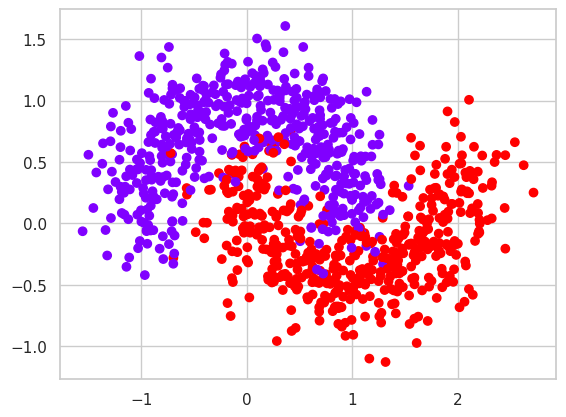

In [3]:
plt.scatter(x[:,0], x[:,1], c=y, cmap='rainbow')

In [4]:
model = Sequential()
model.add(Dense(128,activation = 'relu',input_dim=2))
model.add(Dense(128,activation = 'relu'))
model.add(Dense(1,activation = 'sigmoid'))

adam = Adam(learning_rate = 0.01)
model.compile(optimizer = adam,loss = 'binary_crossentropy',metrics = ['accuracy'])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 128)                 │             384 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 17,025 (66.50 KB)

 Trainable params: 17,025 (66.50 KB)

 Non-trainable params: 0 (0.00 B)

In [5]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [6]:
history = model.fit(x_train,y_train,epochs = 2000,batch_size = 32,validation_split=0.2)

Epoch 1/2000
20/20 ━━━━━━━━━━━━━━━━━━━━ 9s 44ms/step - accuracy: 0.8213 - loss: 0.4370 - val_accuracy: 0.8562 - val_loss: 0.2904
Epoch 2/2000
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.8757 - loss: 0.2768 - val_accuracy: 0.8687 - val_loss: 0.2571
Epoch 3/2000
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.8808 - loss: 0.2496 - val_accuracy: 0.9125 - val_loss: 0.1904
Epoch 4/2000
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.9128 - loss: 0.2000 - val_accuracy: 0.9312 - val_loss: 0.1979
Epoch 5/2000
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.9008 - loss: 0.2172 - val_accuracy: 0.9375 - val_loss: 0.1638
Epoch 6/2000
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.9305 - loss: 0.1690 - val_accuracy: 0.9312 - val_loss: 0.2313
Epoch 7/2000
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9428 - loss: 0.1791 - val_accuracy: 0.9438 - val_loss: 0.1767
Epoch 8/2000
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.9325 - loss: 0.1672 - val_accu

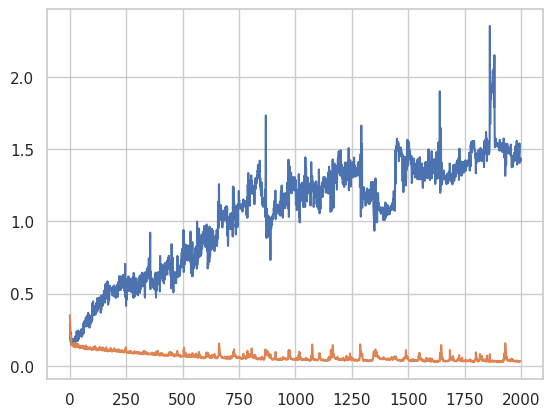

In [7]:
plt.plot(history.history['val_loss'])
plt.plot(history.history['loss'])

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 16s 2ms/step


<Axes: >

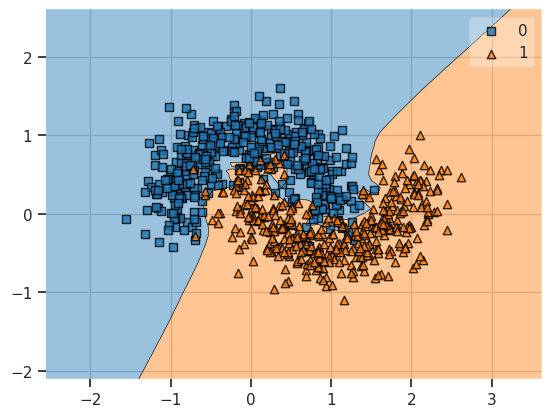

In [8]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(x_train,y_train,clf=model)

In [9]:
from tensorflow.keras.regularizers import l2

In [10]:
# Define the model
model1 = Sequential()
model1.add(Dense(128, activation='relu', input_dim=2, kernel_regularizer=l2(0.03)))
model1.add(Dense(128, activation='relu', kernel_regularizer=l2(0.03)))
model1.add(Dense(1, activation='sigmoid'))

# Compile the model
adam = Adam(learning_rate=0.01)
model1.compile(optimizer=adam, loss='binary_crossentropy', metrics=['accuracy'])

# Display the model's summary
model1.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                      │ (None, 128)                 │             384 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 17,025 (66.50 KB)

 Trainable params: 17,025 (66.50 KB)

 Non-trainable params: 0 (0.00 B)

In [11]:
history1 = model1.fit(x_train,y_train,epochs = 2000,batch_size = 32,validation_split=0.2)

Epoch 1/2000
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.8054 - loss: 2.5080 - val_accuracy: 0.8250 - val_loss: 0.5937
Epoch 2/2000
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8691 - loss: 0.5603 - val_accuracy: 0.8500 - val_loss: 0.4418
Epoch 3/2000
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8654 - loss: 0.3997 - val_accuracy: 0.8687 - val_loss: 0.3894
Epoch 4/2000
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8496 - loss: 0.4213 - val_accuracy: 0.8687 - val_loss: 0.4030
Epoch 5/2000
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8438 - loss: 0.4353 - val_accuracy: 0.8687 - val_loss: 0.4272
Epoch 6/2000
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8483 - loss: 0.4383 - val_accuracy: 0.8500 - val_loss: 0.4331
Epoch 7/2000
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8544 - loss: 0.4352 - val_accuracy: 0.8625 - val_loss: 0.3826
Epoch 8/2000
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8318 - loss: 0.4095 - val_accuracy: 

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 18s 2ms/step


<Axes: >

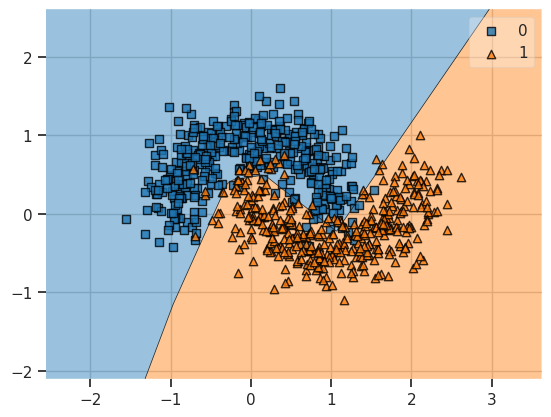

In [12]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(x_train,y_train,clf=model1)

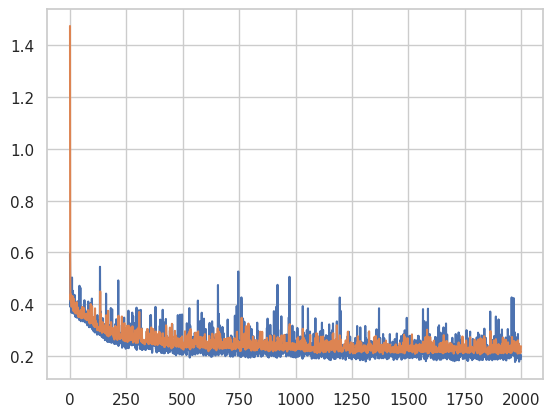

In [13]:
plt.plot(history1.history['val_loss'])
plt.plot(history1.history['loss'])

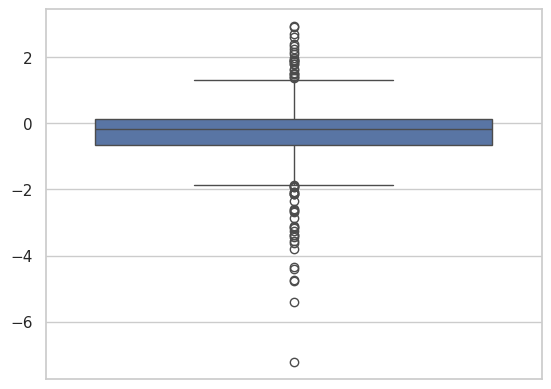

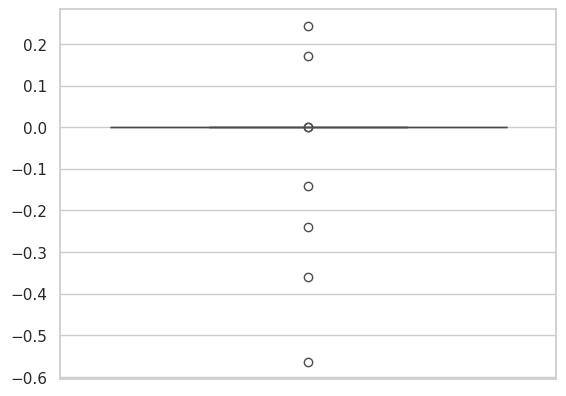

In [15]:
sns.boxplot(model.get_weights()[0].reshape(256))
plt.show()
sns.boxplot(model1.get_weights()[0].reshape(256))
plt.show()

#### Remark: We can see after regularization, most of the weights tends to zero, which are insignifant actually. And the weights which look like outliers are actually significant ones. (Complexity Optimization)